In [1]:
import sys
sys.path.insert(0, '../../src')

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time

from LDPC import LDPC
from QC_LDPC import QC_LDPC
from McEliece import McEliece

In [28]:
def brute(brutelist):
    word = []
    
    matrix = np.array(brutelist, dtype=int).T
    n, k = matrix.shape
    
    for i in range(n):
        elem = 0 if sum(matrix[i]) < k // 2 else 1
        word.append(elem)
    
    return np.array(word, dtype=int)

def get_accuracy(guess, real):
    n = real.shape[0]
    return (n - sum(abs(real - guess))) / n

In [86]:
ITER_NUM = 25

n = 200
d_v = 8
d_c = 10

ldpc = LDPC.from_params(n, d_v, d_c)

crypto = McEliece.from_linear_code(ldpc, 7)
word = np.random.randint(2, size=ldpc.getG().shape[0])

enc_list = []
acc = []

for i in range(ITER_NUM):    
    encrypted = crypto.encrypt(word)
    enc_list.append(encrypted)
    
    bruted = brute(enc_list)
    score = get_accuracy(bruted, crypto.c)
    
    acc.append(score)
    
print(acc)

[0.43, 0.96, 0.95, 0.99, 0.985, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [67]:
from math import atan, pi

def my_atan(x):
    return atan(x*20)/(pi / 2)

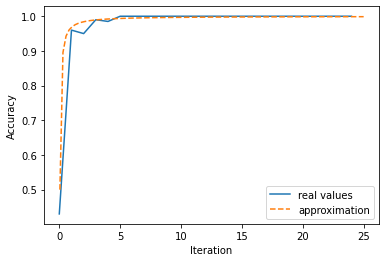

In [87]:
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.plot([i for i in range(ITER_NUM)], acc, label="real values")

x = np.linspace(0.05, ITER_NUM, num=100)
y = np.array(list(map(my_atan, x)))

plt.plot(x, y, linestyle='--', label="approximation")
plt.legend(loc=4)

plt.savefig("bruteforce.png", dpi=100)